In [3]:
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
surface_data = np.fromfile('./gl-latlong-1km-landcover.bsq'
                           ,dtype = np.uint8).reshape([21600, -1])

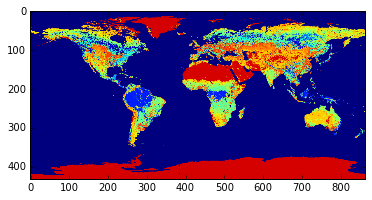

In [6]:
imshow(surface_data[::50,::50])

In [7]:
def mapping_function(Lat,Lon,plot_ = False):
    #pixel size 0.00833 Lon 0.00833 Lat
    ratio = 360./43200.
    px_Lon = int( (Lon + 180) / ratio )
    py_Lat = int( (180 - (Lat + 90)) / ratio)
    
    
    if plot_:
        print (py_Lat,px_Lon)
    
        print (surface_data[py_Lat,px_Lon])
    
    
        scope = 1700
        Lat_ref = py_Lat
        Lon_ref = px_Lon
        mult_t = 1
        imshow(surface_data[(Lat_ref-scope):(Lat_ref+mult_t*scope),(Lon_ref-scope):(Lon_ref+mult_t*scope)][::50,::50])
    
    return surface_data[py_Lat,px_Lon]
    

(5400, 22800)
11


11

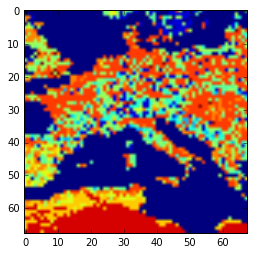

In [8]:
mapping_function(45, 10,plot_ = True)

# Pandas

### Powerful Python data analysis toolkit
+ python **package**
+ **fast**, **flexible**, and **expressive data structures** designed to make working with “relational” or **“labeled” data** both easy and intuitive
+ **goal** of becoming the **most powerful and flexible open source data analysis / manipulation tool** available in any language

+ The fundamental data types are **DataFrames**: **tabular data objects with labelled columns** of possibly different types (numbers, strings, dates, categories...)

# Reading the events file

### It is a ";"-separated datafile starting with coments and with known color of mixed type

In [9]:
!head -n 40 events_4.5.txt

#Data	Da: 2010/01/01	A: 2014/03/12
#Latitudine	Min: 30.0	Max: 46.0
#Longitudine	Min: 5.0	Max: 30.0
#Magnitudo	Min: 4.5	Max: 10.0	Tipo: Mag pref
#Profondit� (km)	Min: ND	Max: ND
#Terremoti totali:	 148
#Tempo Origine (UTC);Latitudine;Longitudine;Profondit�;Magnitudo;Fonte;
2014-03-05 12:49:21.600;38.159;20.272;10.0;4.8;SURVEY;
2014-02-15 07:31:17.800;38.34;20.28;2.0;4.9;SURVEY;
2014-02-14 03:38:01.000;38.26;20.29;10.0;4.7;SURVEY;
2014-02-09 08:23:02.000;38.28;20.29;10.0;4.5;AGENDA;
2014-02-06 19:20:59.340;38.12;20.339;6.4;4.6;SURVEY;
2014-02-03 03:08:46.000;38.29;20.31;10.0;5.8;AGENDA;
2014-02-01 16:33:40.000;38.21;20.36;2.0;5.0;AGENDA;
2014-01-29 21:04:00.000;37.2;21.69;20.0;4.6;AGENDA;
2014-01-27 13:05:54.000;38.3;20.4;33.0;4.7;AGENDA;
2014-01-26 21:15:35.500;38.109;20.324;12.2;4.6;SURVEY;
2014-01-26 18:45:07.620;38.205;20.358;10.0;5.1;SURVEY;
2014-01-26 13:55:44.000;38.23;20.48;10.0;5.9;AGENDA;
2014-01-20 06:00:15.000;41.27;19.46;10.0;4.5;AGENDA;
2013-12-29 17:08:43.640;41.369;14.444

In [10]:
events = pd.read_csv('./events_4.5.txt'
                     , sep=';'
                     , comment="#"
                     , index_col = False
                     , names = [
        'date','lat','long','depth','mag','source']
)

### Note: some of the "sources" are empty. Pandas will map them to NaN

In [11]:
events

date     lat    long  depth  mag    source
0    2014-03-05 12:49:21.600  38.159  20.272   10.0  4.8    SURVEY
1    2014-02-15 07:31:17.800  38.340  20.280    2.0  4.9    SURVEY
2    2014-02-14 03:38:01.000  38.260  20.290   10.0  4.7    SURVEY
3    2014-02-09 08:23:02.000  38.280  20.290   10.0  4.5    AGENDA
4    2014-02-06 19:20:59.340  38.120  20.339    6.4  4.6    SURVEY
5    2014-02-03 03:08:46.000  38.290  20.310   10.0  5.8    AGENDA
6    2014-02-01 16:33:40.000  38.210  20.360    2.0  5.0    AGENDA
7    2014-01-29 21:04:00.000  37.200  21.690   20.0  4.6    AGENDA
8    2014-01-27 13:05:54.000  38.300  20.400   33.0  4.7    AGENDA
9    2014-01-26 21:15:35.500  38.109  20.324   12.2  4.6    SURVEY
10   2014-01-26 18:45:07.620  38.205  20.358   10.0  5.1    SURVEY
11   2014-01-26 13:55:44.000  38.230  20.480   10.0  5.9    AGENDA
12   2014-01-20 06:00:15.000  41.270  19.460   10.0  4.5    AGENDA
13   2013-12-29 17:08:43.640  41.369  14.444   10.5  5.0    SURVEY
14   2013-11-18 07:58:41.590  43.638  16.997    9.2  4.8    SURVEY
15   2013-11-12 18:09:27.000  38.902  23.090   10.0  4.8    AGENDA
16   2013-10-15 19:33:12.000  45.630  26.590  150.0  4.8    AGENDA
17   2013-10-12 13:11:53.000  35.520  23.280   52.0  6.4    AGENDA
18   2013-10-06 01:37:20.000  45.740  26.550  114.0  5.4    AGENDA
19   2013-09-16 15:01:16.000  38.750  22.800   10.0  5.3    AGENDA
20   2013-09-16 14:42:41.000  38.740  22.750   10.0  4.6    AGENDA
21   2013-09-09 17:35:00.000  38.030  20.780   10.0  4.5    AGENDA
22   2013-09-08 04:59:30.000  34.830  25.080    2.0  5.0    AGENDA
23   2013-08-09 04:19:24.000  39.330  20.380    5.0  4.5    AGENDA
24   2013-08-07 09:06:51.000  38.700  22.680   10.0  5.1    AGENDA
25   2013-07-21 01:32:24.640  43.501  13.668    8.4  4.9    SURVEY
26   2013-07-03 13:28:24.570  40.374  21.873   10.0  4.9    SURVEY
27   2013-06-30 14:40:08.300  44.171  10.205    9.8  4.5    SURVEY
28   2013-06-21 10:33:57.240  44.153  10.135    5.1  5.1    SURVEY
29   2013-06-16 21:39:28.000  34.260  24.960   10.0  5.9    AGENDA
..                       ...     ...     ...    ...  ...       ...
118  2010-12-17 09:37:48.000  36.950  24.000  104.0  4.9       NaN
119  2010-11-13 18:24:59.000  35.080   9.420   10.0  4.6       NaN
120  2010-11-03 18:13:02.980  39.983  13.274  505.6  5.4  BULLETIN
121  2010-11-03 02:51:27.000  40.430  26.300   10.0  5.3       NaN
122  2010-11-03 00:56:54.000  43.740  20.690    2.0  5.3       NaN
123  2010-10-23 06:17:41.000  39.970  21.440    2.0  4.5       NaN
124  2010-10-11 00:34:35.000  42.420  21.590    2.0  4.5       NaN
125  2010-10-10 19:17:54.000  35.300  22.240   10.0  4.5       NaN
126  2010-10-09 19:04:49.000  38.160  22.710    2.0  4.5       NaN
127  2010-08-16 12:54:47.050  38.410  14.919   16.9  4.6  BULLETIN
128  2010-08-15 12:11:48.000  37.220  20.890   15.0  4.7       NaN
129  2010-08-11 10:47:54.000  39.400  20.500   15.0  4.5       NaN
130  2010-08-08 09:00:29.000  40.500  23.600   10.0  4.6       NaN
131  2010-08-08 04:06:34.000  34.700  24.400   18.0  4.9       NaN
132  2010-08-06 02:37:45.000  34.230  25.030   28.0  4.8       NaN
133  2010-07-20 03:10:25.000  35.820  21.860   30.0  4.7       NaN
134  2010-07-16 18:53:10.000  39.310  23.990   10.0  5.1       NaN
135  2010-07-13 03:18:10.000  36.230  21.810   30.0  4.7       NaN
136  2010-07-09 22:15:10.460  41.137  19.761   10.0  4.7  BULLETIN
137  2010-06-08 15:16:10.000  45.570  26.420  110.0  4.5       NaN
138  2010-05-02 12:24:37.000  35.600  24.700   88.0  4.5       NaN
139  2010-04-24 15:01:11.000  34.200  26.040   30.0  5.2       NaN
140  2010-03-26 18:35:55.000  38.150  26.310   15.0  4.8       NaN
141  2010-03-10 13:38:07.000  42.800  20.700   16.0  4.5       NaN
142  2010-02-11 21:56:30.000  33.980  25.420   10.0  5.3       NaN
143  2010-02-11 02:25:51.390  42.204  19.509   10.0  4.8  BULLETIN
144  2010-01-30 13:47:44.000  38.300  22.400    2.0  4.5       NaN
145  2010-01-22 00:46:57.000  38.420  22.040    2.0  5.2       NaN
146 

In [12]:
events.dtypes

date       object
lat       float64
long      float64
depth     float64
mag       float64
source     object
dtype: object

#### Automatic datetime conversion/comprehension from strings

In [13]:
events['date'] = pd.to_datetime(events['date'])

In [20]:
events.date.diff()

0                           NaT
1     -19 days +18:41:56.200000
2      -2 days +20:06:43.200000
3             -5 days +04:45:01
4      -3 days +10:57:57.340000
5      -4 days +07:47:46.660000
6             -2 days +13:24:54
7             -3 days +04:30:20
8             -3 days +16:01:54
9      -1 days +08:09:41.500000
10     -1 days +21:29:32.120000
11     -1 days +19:10:36.380000
12            -7 days +16:04:31
13    -22 days +11:08:28.640000
14    -42 days +14:49:57.950000
15     -6 days +10:10:45.410000
16           -28 days +01:23:45
17            -4 days +17:38:41
18            -7 days +12:25:27
19           -20 days +13:23:56
20            -1 days +23:41:25
21            -7 days +02:52:19
22            -2 days +11:24:30
23           -31 days +23:19:54
24            -2 days +04:47:27
25    -18 days +16:25:33.640000
26    -18 days +11:55:59.930000
27     -3 days +01:11:43.730000
28    -10 days +19:53:48.940000
29     -5 days +11:05:30.760000
                 ...           
118     

In [18]:
events.date.dt.weekday_name

0      Wednesday
1       Saturday
2         Friday
3         Sunday
4       Thursday
5         Monday
6       Saturday
7      Wednesday
8         Monday
9         Sunday
10        Sunday
11        Sunday
12        Monday
13        Sunday
14        Monday
15       Tuesday
16       Tuesday
17      Saturday
18        Sunday
19        Monday
20        Monday
21        Monday
22        Sunday
23        Friday
24     Wednesday
25        Sunday
26     Wednesday
27        Sunday
28        Friday
29        Sunday
         ...    
118       Friday
119     Saturday
120    Wednesday
121    Wednesday
122    Wednesday
123     Saturday
124       Monday
125       Sunday
126     Saturday
127       Monday
128       Sunday
129    Wednesday
130       Sunday
131       Sunday
132       Friday
133      Tuesday
134       Friday
135      Tuesday
136       Friday
137      Tuesday
138       Sunday
139     Saturday
140       Friday
141    Wednesday
142     Thursday
143     Thursday
144     Saturday
145       Frid

In [ ]:
events.date.dt.month.value_counts().sort_index().plot.bar()
plt.xlabel('month')
plt.ylabel('events')

In [47]:
events.date.dt.month.value_counts().sort_index() #.plot.bar()

1     18
2     14
3      7
4     11
5     21
6     14
7     15
8     12
9     12
10    12
11     7
12     5
Name: date, dtype: int64

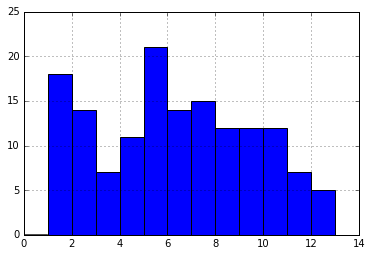

In [51]:
events.date.dt.month.hist(bins=np.arange(14))

## In which type of land did an event happen?

In [26]:
def map_single_row(row):
    return mapping_function(row.lat, row.long)

events['location_type'] = events.apply(map_single_row
                                       , axis = 1)

In [27]:
events

date     lat    long  depth  mag    source  \
0   2014-03-05 12:49:21.600  38.159  20.272   10.0  4.8    SURVEY   
1   2014-02-15 07:31:17.800  38.340  20.280    2.0  4.9    SURVEY   
2   2014-02-14 03:38:01.000  38.260  20.290   10.0  4.7    SURVEY   
3   2014-02-09 08:23:02.000  38.280  20.290   10.0  4.5    AGENDA   
4   2014-02-06 19:20:59.340  38.120  20.339    6.4  4.6    SURVEY   
5   2014-02-03 03:08:46.000  38.290  20.310   10.0  5.8    AGENDA   
6   2014-02-01 16:33:40.000  38.210  20.360    2.0  5.0    AGENDA   
7   2014-01-29 21:04:00.000  37.200  21.690   20.0  4.6    AGENDA   
8   2014-01-27 13:05:54.000  38.300  20.400   33.0  4.7    AGENDA   
9   2014-01-26 21:15:35.500  38.109  20.324   12.2  4.6    SURVEY   
10  2014-01-26 18:45:07.620  38.205  20.358   10.0  5.1    SURVEY   
11  2014-01-26 13:55:44.000  38.230  20.480   10.0  5.9    AGENDA   
12  2014-01-20 06:00:15.000  41.270  19.460   10.0  4.5    AGENDA   
13  2013-12-29 17:08:43.640  41.369  14.444   10.5  5.0    SURVEY   
14  2013-11-18 07:58:41.590  43.638  16.997    9.2  4.8    SURVEY   
15  2013-11-12 18:09:27.000  38.902  23.090   10.0  4.8    AGENDA   
16  2013-10-15 19:33:12.000  45.630  26.590  150.0  4.8    AGENDA   
17  2013-10-12 13:11:53.000  35.520  23.280   52.0  6.4    AGENDA   
18  2013-10-06 01:37:20.000  45.740  26.550  114.0  5.4    AGENDA   
19  2013-09-16 15:01:16.000  38.750  22.800   10.0  5.3    AGENDA   
20  2013-09-16 14:42:41.000  38.740  22.750   10.0  4.6    AGENDA   
21  2013-09-09 17:35:00.000  38.030  20.780   10.0  4.5    AGENDA   
22  2013-09-08 04:59:30.000  34.830  25.080    2.0  5.0    AGENDA   
23  2013-08-09 04:19:24.000  39.330  20.380    5.0  4.5    AGENDA   
24  2013-08-07 09:06:51.000  38.700  22.680   10.0  5.1    AGENDA   
25  2013-07-21 01:32:24.640  43.501  13.668    8.4  4.9    SURVEY   
26  2013-07-03 13:28:24.570  40.374  21.873   10.0  4.9    SURVEY   
27  2013-06-30 14:40:08.300  44.171  10.205    9.8  4.5    SURVEY   
28  2013-06-21 10:33:57.240  44.153  10.135    5.1  5.1    SURVEY   
29  2013-06-16 21:39:28.000  34.260  24.960   10.0  5.9    AGENDA   
..                      ...     ...     ...    ...  ...       ...   
118 2010-12-17 09:37:48.000  36.950  24.000  104.0  4.9       NaN   
119 2010-11-13 18:24:59.000  35.080   9.420   10.0  4.6       NaN   
120 2010-11-03 18:13:02.980  39.983  13.274  505.6  5.4  BULLETIN   
121 2010-11-03 02:51:27.000  40.430  26.300   10.0  5.3       NaN   
122 2010-11-03 00:56:54.000  43.740  20.690    2.0  5.3       NaN   
123 2010-10-23 06:17:41.000  39.970  21.440    2.0  4.5       NaN   
124 2010-10-11 00:34:35.000  42.420  21.590    2.0  4.5       NaN   
125 2010-10-10 19:17:54.000  35.300  22.240   10.0  4.5       NaN   
126 2010-10-09 19:04:49.000  38.160  22.710    2.0  4.5       NaN   
127 2010-08-16 12:54:47.050  38.410  14.919   16.9  4.6  BULLETIN   
128 2010-08-15 12:11:48.000  37.220  20.890   15.0  4.7       NaN   
129 2010-08-11 10:47:54.000  39.400  20.500   15.0  4.5       NaN   
130 2010-08-08 09:00:29.000  40.500  23.600   10.0  4.6       NaN   
131 2010-08-08 04:06:34.000  34.700  24.400   18.0  4.9       NaN   
132 2010-08-06 02:37:45.000  34.230  25.030   28.0  4.8       NaN   
133 2010-07-20 03:10:25.000  35.820  21.860   30.0  4.7       NaN   
134 2010-07-16 18:53:10.000  39.310  23.990   10.0  5.1       NaN   
135 2010-07-13 03:18:10.000  36.230  21.810   30.0  4.7       NaN   
136 2010-07-09 22:15:10.460  41.137  19.761   10.0  4.7  BULLETIN   
137 2010-06-08 15:16:10.000  45.570  26.420  110.0  4.5       NaN   
138 2010-05-02 12:24:37.000  35.600  24.700   88.0  4.5       NaN   
139 2010-04-24 15:01:11.000  34.200  26.040   30.0  5.2       NaN   
140 2010-03-26 18:35:55.000  38.150  26.310   15.0  4.8       NaN   
141 2010-03-10 13:38:07.000  42.800  20.700   16.0  4.5       NaN   
142 2010-02-11 21:56:30.000  33.980  25.420   10.0  5.3       NaN   
143 2010-02-11 02:25:51.390  42.204  19.509   10.0  4.8  BULLETIN   
144 2010-01-30 13:47:

## Python allows inline function declaration via `lambda`

In [ ]:
events['location_type'] = events.apply(lambda x : mapping_function(x.lat, x.long)
                                       , axis = 1)

## Quick reading of the land "text" type

#### Note: copy-pasting from website gives a tab-separated table

In [28]:
mapping_of_loc = """
0	Water	068	079	137
1	Evergreen Needleleaf Forest	001	100	000
2	Evergreen Broadleaf Forest	001	130	000
3	Deciduous Needleleaf Forest	151	191	071
4	Deciduous Broadleaf Forest	002	220	000
5	Mixed Forest	000	255	000
6	Woodland	146	174	047
7	Wooded Grassland	220	206	000
8	Closed Shrubland	255	173	000
9	Open Shrubland	255	251	195
10	Grassland	140	072	009
11	Cropland	247	165	255
12	Bare Ground	255	199	174
13	Urban and Built	000	255	255
"""

In [29]:
import sys
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO

type_mapping_csv = pd.read_csv(StringIO(mapping_of_loc)
                               , sep='\t'
                               , index_col = False
                               , names=['location_type','text_type','f1','f2','f3'])

In [30]:
type_mapping_csv

location_type                    text_type   f1   f2   f3
0               0                        Water   68   79  137
1               1  Evergreen Needleleaf Forest    1  100    0
2               2   Evergreen Broadleaf Forest    1  130    0
3               3  Deciduous Needleleaf Forest  151  191   71
4               4   Deciduous Broadleaf Forest    2  220    0
5               5                 Mixed Forest    0  255    0
6               6                     Woodland  146  174   47
7               7             Wooded Grassland  220  206    0
8               8             Closed Shrubland  255  173    0
9               9               Open Shrubland  255  251  195
10             10                    Grassland  140   72    9
11             11                     Cropland  247  165  255
12             12                  Bare Ground  255  199  174
13             13              Urban and Built    0  255  255

### We are interested in few columns only

In [31]:
type_mapping_csv[['location_type','text_type']]

location_type                    text_type
0               0                        Water
1               1  Evergreen Needleleaf Forest
2               2   Evergreen Broadleaf Forest
3               3  Deciduous Needleleaf Forest
4               4   Deciduous Broadleaf Forest
5               5                 Mixed Forest
6               6                     Woodland
7               7             Wooded Grassland
8               8             Closed Shrubland
9               9               Open Shrubland
10             10                    Grassland
11             11                     Cropland
12             12                  Bare Ground
13             13              Urban and Built

## Merging operation: adding the column "text_type" to the events df

In [32]:
events = pd.merge(events
                  , type_mapping_csv[['location_type','text_type']]
                  , on='location_type')

In [33]:
events

date     lat    long  depth  mag    source  \
0   2014-03-05 12:49:21.600  38.159  20.272   10.0  4.8    SURVEY   
1   2014-02-15 07:31:17.800  38.340  20.280    2.0  4.9    SURVEY   
2   2014-02-14 03:38:01.000  38.260  20.290   10.0  4.7    SURVEY   
3   2014-02-09 08:23:02.000  38.280  20.290   10.0  4.5    AGENDA   
4   2014-02-06 19:20:59.340  38.120  20.339    6.4  4.6    SURVEY   
5   2014-02-03 03:08:46.000  38.290  20.310   10.0  5.8    AGENDA   
6   2014-02-01 16:33:40.000  38.210  20.360    2.0  5.0    AGENDA   
7   2014-01-26 21:15:35.500  38.109  20.324   12.2  4.6    SURVEY   
8   2014-01-26 18:45:07.620  38.205  20.358   10.0  5.1    SURVEY   
9   2014-01-26 13:55:44.000  38.230  20.480   10.0  5.9    AGENDA   
10  2014-01-20 06:00:15.000  41.270  19.460   10.0  4.5    AGENDA   
11  2013-10-12 13:11:53.000  35.520  23.280   52.0  6.4    AGENDA   
12  2013-09-09 17:35:00.000  38.030  20.780   10.0  4.5    AGENDA   
13  2013-09-08 04:59:30.000  34.830  25.080    2.0  5.0    AGENDA   
14  2013-07-21 01:32:24.640  43.501  13.668    8.4  4.9    SURVEY   
15  2013-06-16 21:39:28.000  34.260  24.960   10.0  5.9    AGENDA   
16  2013-06-15 16:11:03.000  34.430  25.040   26.0  5.8    AGENDA   
17  2013-06-06 11:53:46.000  36.710  21.750   40.0  5.0    AGENDA   
18  2013-04-06 11:26:08.000  34.730  24.020   40.0  5.2    AGENDA   
19  2013-01-08 14:16:09.000  39.640  25.550   11.0  5.8    AGENDA   
20  2013-01-03 08:39:14.000  34.140  25.070   40.0  4.5    AGENDA   
21  2012-10-23 15:20:41.000  38.930  20.660    2.0  4.7    AGENDA   
22  2012-10-16 15:10:57.360  39.651  15.724  279.3  4.6    SURVEY   
23  2012-09-22 03:52:00.000  38.100  22.770   10.0  5.2    AGENDA   
24  2012-09-21 08:47:39.000  35.160  22.460   10.0  4.9    AGENDA   
25  2012-09-12 03:27:00.000  34.740  24.020   20.0  5.6    AGENDA   
26  2012-08-28 23:12:15.810  38.250  15.709   45.4  4.5    SURVEY   
27  2012-07-04 11:12:10.330  37.469  16.742   48.5  4.5    SURVEY   
28  2012-06-18 22:09:50.000  39.190   6.250   10.0  4.5    AGENDA   
29  2012-06-10 12:44:15.000  36.350  28.940   10.0  6.0    AGENDA   
..                      ...     ...     ...    ...  ...       ...   
118 2013-08-07 09:06:51.000  38.700  22.680   10.0  5.1    AGENDA   
119 2012-05-29 11:00:25.000  44.879  10.947    5.4  5.2    AGENDA   
120 2012-05-29 11:00:02.000  44.873  10.950   11.0  4.9    AGENDA   
121 2011-10-04 09:26:29.000  39.200  21.620    5.0  4.5       NaN   
122 2013-10-15 19:33:12.000  45.630  26.590  150.0  4.8    AGENDA   
123 2012-01-27 14:53:12.740  44.523  10.009   72.4  4.9  BULLETIN   
124 2011-10-04 02:40:46.000  45.580  26.530  150.0  4.8       NaN   
125 2011-05-01 02:24:15.000  45.600  26.580  150.0  4.7       NaN   
126 2010-06-08 15:16:10.000  45.570  26.420  110.0  4.5       NaN   
127 2013-10-06 01:37:20.000  45.740  26.550  114.0  5.4    AGENDA   
128 2011-12-12 17:04:42.030  43.286  19.586   10.0  4.8  BULLETIN   
129 2011-06-23 22:02:46.710  38.064  14.784    7.3  4.5  BULLETIN   
130 2013-06-30 14:40:08.300  44.171  10.205    9.8  4.5    SURVEY   
131 2013-06-21 10:33:57.240  44.153  10.135    5.1  5.1    SURVEY   
132 2013-01-25 14:48:18.600  44.168  10.454   15.5  4.8    SURVEY   
133 2013-05-11 04:42:38.140  32.781  12.537   20.0  4.7    SURVEY   
134 2010-11-13 18:24:59.000  35.080   9.420   10.0  4.6       NaN   
135 2013-02-21 05:54:39.100  37.731  21.485  115.1  4.5    SURVEY   
136 2013-02-16 21:16:09.290  41.714  13.576   10.7  4.8    SURVEY   
137 2012-07-14 12:52:07.000  42.590  23.110   10.0  5.2    AGENDA   
138 2012-03-25 04:46:54.000  39.460  20.530    1.0  4.7       NaN   
139 2011-11-10 17:25:39.000  38.420  21.820    5.0  4.6       NaN   
140 2011-09-14 03:35:28.000  37.200  22.050    1.0  4.9       NaN   
141 2011-07-11 16:09:14.000  40.140  29.960   24.0  4.7       NaN   
142 2011-04-19 12:13:19.000  38.120  21.960   55.0  4.5       NaN   
143 2011-04-15 03:18:33.000  36.600  23.010   40.0  4.5       NaN   
144 2010-07-09 22:15:

## What were the statistics of the magnitude per land type?

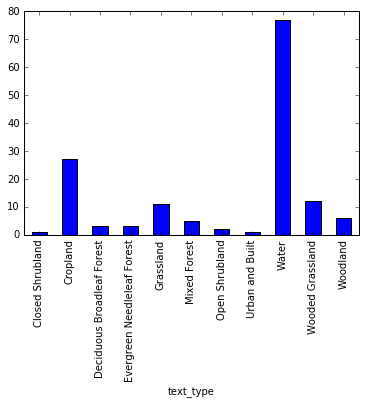

In [36]:
events.groupby('text_type').size().plot.bar()

In [41]:
events.groupby('text_type').mag.describe() #.plot.bar()

text_type                         
Closed Shrubland             count     1.000000
                             mean      4.700000
                             std            NaN
                             min       4.700000
                             25%       4.700000
                             50%       4.700000
                             75%       4.700000
                             max       4.700000
Cropland                     count    27.000000
                             mean      4.925926
                             std       0.436412
                             min       4.500000
                             25%       4.550000
                             50%       4.800000
                             75%       5.200000
                             max       5.900000
Deciduous Broadleaf Forest   count     3.000000
                             mean      4.800000
                             std       0.300000
                             min       4.500000
     

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 11 Text xticklabel objects>)

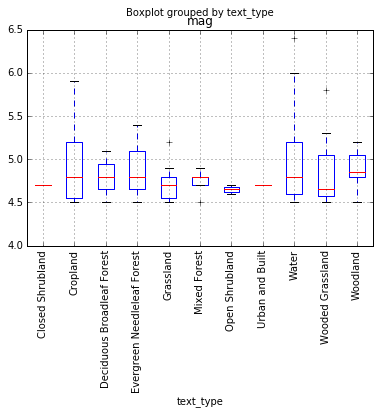

In [42]:
events.boxplot(column='mag', by='text_type')
plt.ylim([4,6.5])
plt.xticks(rotation='vertical')

## What about the geographic distribution?

In [44]:
cuts_lat = pd.cut(events.lat,bins = 10) #.groupby('source').size()
cuts_long = pd.cut(events.long,bins = 10)

grps_geo = events.groupby([cuts_lat,cuts_long])



In [45]:
grps_geo.text_type.value_counts() #.unstack()

lat                long              text_type                  
(32.768, 34.0769]  (10.992, 13.363]  Open Shrubland                  1
                   (25.218, 27.589]  Water                           1
(34.0769, 35.373]  (8.621, 10.992]   Open Shrubland                  1
                   (20.476, 22.847]  Water                           2
                   (22.847, 25.218]  Water                          10
                   (25.218, 27.589]  Water                           3
                   (27.589, 29.96]   Water                           2
(35.373, 36.669]   (10.992, 13.363]  Water                           1
                   (20.476, 22.847]  Water                           4
                   (22.847, 25.218]  Water                           6
                                     Grassland                       1
                   (25.218, 27.589]  Water                           3
                   (27.589, 29.96]   Water                           2
(36.669, 37.

In [43]:
pd.cut(events.lat,bins = 10)

0       (37.965, 39.261]
1       (37.965, 39.261]
2       (37.965, 39.261]
3       (37.965, 39.261]
4       (37.965, 39.261]
5       (37.965, 39.261]
6       (37.965, 39.261]
7       (37.965, 39.261]
8       (37.965, 39.261]
9       (37.965, 39.261]
10      (40.556, 41.852]
11      (35.373, 36.669]
12      (37.965, 39.261]
13     (34.0769, 35.373]
14      (43.148, 44.444]
15     (34.0769, 35.373]
16     (34.0769, 35.373]
17      (36.669, 37.965]
18     (34.0769, 35.373]
19      (39.261, 40.556]
20     (34.0769, 35.373]
21      (37.965, 39.261]
22      (39.261, 40.556]
23      (37.965, 39.261]
24     (34.0769, 35.373]
25     (34.0769, 35.373]
26      (37.965, 39.261]
27      (36.669, 37.965]
28      (37.965, 39.261]
29      (35.373, 36.669]
             ...        
118     (37.965, 39.261]
119      (44.444, 45.74]
120      (44.444, 45.74]
121     (37.965, 39.261]
122      (44.444, 45.74]
123      (44.444, 45.74]
124      (44.444, 45.74]
125      (44.444, 45.74]
126      (44.444, 45.74]
